In [1]:
import pandas as pd
import plotly.express as px
import numpy as np
%matplotlib inline
from itertools import repeat

In [2]:
passing = pd.read_csv('C:/Users/caleb/OneDrive/Documents/Spring 2022 Classes/Directed Masters Project/Clean Data/Combined/Passing.csv', index_col = 0)
passing.head()

,Name,Year,Age,Tm,G,GS,Cmp,Att,Cmp%,Yds,TD,Int,Int%,Y/A,Y/C,Y/G,Rate
0,Fran Tarkenton,1978,38,MIN,16,16,345,572,60.3,3468,25,32,5.6,6.1,10.1,216.8,68.9
1,Archie Manning,1978,29,NOR,16,16,291,471,61.8,3416,17,16,3.4,7.3,11.7,213.5,81.7
2,Jim Zorn,1978,25,SEA,16,16,248,443,56.0,3283,15,20,4.5,7.4,13.2,205.2,72.1
3,Roger Staubach,1978,36,DAL,15,15,231,413,55.9,3190,25,16,3.9,7.7,13.8,212.7,84.9
4,Jim Hart,1978,34,STL,15,15,240,477,50.3,3121,16,18,3.8,6.5,13.0,208.1,66.7


### Add TD% to the data

In [81]:
passing['TD%'] = passing['TD'] / passing['Att']
passing['Int%'] = passing['Int'] / passing['Att']
passing['Y/A'] = passing['Yds'] / passing['Att']
passing['Cmp%'] = passing['Cmp'] / passing['Att']
passing.head()

,Name,Year,Age,Tm,G,GS,Cmp,Att,Cmp%,Yds,TD,Int,Int%,Y/A,Y/C,Y/G,Rate,TD%
0,Fran Tarkenton,1978,38,MIN,16,16,345,572,0.603147,3468,25,32,0.055944,6.062937,10.1,216.8,68.9,0.043706
1,Archie Manning,1978,29,NOR,16,16,291,471,0.617834,3416,17,16,0.033970,7.252654,11.7,213.5,81.7,0.036093
2,Jim Zorn,1978,25,SEA,16,16,248,443,0.559819,3283,15,20,0.045147,7.410835,13.2,205.2,72.1,0.033860
3,Roger Staubach,1978,36,DAL,15,15,231,413,0.559322,3190,25,16,0.038741,7.723971,13.8,212.7,84.9,0.060533
4,Jim Hart,1978,34,STL,15,15,240,477,0.503145,3121,16,18,0.037736,6.542977,13.0,208.1,66.7,0.033543


In [82]:
pass_inflation = pd.read_csv('C:/Users/caleb/OneDrive/Documents/Spring 2022 Classes/Directed Masters Project/Clean Data/Inflation/Passing.csv', index_col = 0)
pass_inflation.head()

,Year,Y/A Factor,Cmp% Factor,TD% Factor,Int% Factor
0,1978,1.000000,1.000000,1.000000,1.000000
1,1979,1.021521,1.019404,1.047715,0.851491
2,1980,1.040801,1.058478,1.117624,0.846907
3,1981,1.045635,1.029134,1.053449,0.795039
4,1982,1.043163,1.062638,1.019564,0.814395


# Merge the inflation factor into every individual record

In [83]:
passing2 = pd.merge(passing, pass_inflation, how = 'left', on = 'Year')
passing2.tail()

,Name,Year,Age,Tm,G,GS,Cmp,Att,Cmp%,Yds,...,Int%,Y/A,Y/C,Y/G,Rate,TD%,Y/A Factor,Cmp% Factor,TD% Factor,Int% Factor
4498,Cordarrelle Patterson,2021,30,ATL,16,13,0,1,0.0,0,...,0.0,0.0,NaN,0.0,39.6,0.0,1.055231,1.22052,1.134648,0.435291
4499,Brett Rypien,2021,25,DEN,1,0,0,2,0.0,0,...,0.0,0.0,NaN,0.0,39.6,0.0,1.055231,1.22052,1.134648,0.435291
4500,D'Andre Swift,2021,22,DET,13,4,0,1,0.0,0,...,0.0,0.0,NaN,0.0,39.6,0.0,1.055231,1.22052,1.134648,0.435291
4501,Albert Wilson,2021,29,MIA,14,5,0,1,0.0,0,...,0.0,0.0,NaN,0.0,39.6,0.0,1.055231,1.22052,1.134648,0.435291
4502,Brandon Zylstra,2021,28,CAR,13,3,0,1,0.0,0,...,0.0,0.0,NaN,0.0,39.6,0.0,1.055231,1.22052,1.134648,0.435291


# Adjust stats by inflation

In [86]:
adj_ya = passing2['Y/A'] / passing2['Y/A Factor']
adj_cmp = passing2['Cmp%'] / passing2['Cmp% Factor']
adj_td = passing2['TD%'] / passing2['TD% Factor']
adj_int = passing2['Int%'] / passing2['Int% Factor']
name = passing2['Name']
year = passing2['Year']
yards = passing2['Yds']
att = passing2['Att']
games = passing2['G']
age = passing2['Age']
cmp = passing2['Cmp']
td = passing2['TD']
inter = passing2['Int']

In [87]:
passing_dict = {'Name': name, 'Year': year, 'Age': age, 'Games': games, 'Attempts': att, 'Completions': cmp, 'Yards': yards, "TD": td, 'Int': inter, "Adj Y/A": adj_ya, 'Adj Cmp%': adj_cmp, 'Adj TD%': adj_td, 'Adj Int%': adj_int}
adj_passing = pd.DataFrame(passing_dict)
adj_passing.head()

,Name,Year,Age,Games,Attempts,Completions,Yards,TD,Int,Adj Y/A,Adj Cmp%,Adj TD%,Adj Int%
0,Fran Tarkenton,1978,38,16,572,345,3468,25,32,6.062937,0.603147,0.043706,0.055944
1,Archie Manning,1978,29,16,471,291,3416,17,16,7.252654,0.617834,0.036093,0.033970
2,Jim Zorn,1978,25,16,443,248,3283,15,20,7.410835,0.559819,0.033860,0.045147
3,Roger Staubach,1978,36,15,413,231,3190,25,16,7.723971,0.559322,0.060533,0.038741
4,Jim Hart,1978,34,15,477,240,3121,16,18,6.542977,0.503145,0.033543,0.037736


In [88]:
adj_passing[adj_passing.Name == 'Peyton Manning']

,Name,Year,Age,Games,Attempts,Completions,Yards,TD,Int,Adj Y/A,Adj Cmp%,Adj TD%,Adj Int%
2062,Peyton Manning,1998,22,16,575,326,3739,26,28,6.385329,0.531673,0.042112,0.080048
2168,Peyton Manning,1999,23,16,533,331,4135,26,15,7.721455,0.577394,0.048640,0.045337
2267,Peyton Manning,2000,24,16,571,357,4413,33,15,7.703569,0.570285,0.058865,0.043620
2367,Peyton Manning,2001,25,16,547,343,4131,26,23,7.496154,0.564347,0.047920,0.067438
2475,Peyton Manning,2002,26,16,591,392,4200,27,19,7.112586,0.590187,0.045036,0.056876
2580,Peyton Manning,2003,27,16,566,379,4267,29,10,7.639290,0.604572,0.051121,0.029259
2703,Peyton Manning,2004,28,16,497,336,4557,49,10,8.743888,0.600477,0.087147,0.033923
2822,Peyton Manning,2005,29,16,453,305,3747,28,10,8.198160,0.600935,0.062518,0.038801
2915,Peyton Manning,2006,30,16,557,362,4397,31,9,7.749850,0.577072,0.055691,0.027510
3018,Peyton Manning,2007,31,16,515,337,4040,31,14,7.694557,0.567828,0.056379,0.046874


In [89]:
passing[passing.Name == 'Peyton Manning']

,Name,Year,Age,Tm,G,GS,Cmp,Att,Cmp%,Yds,TD,Int,Int%,Y/A,Y/C,Y/G,Rate,TD%
2062,Peyton Manning,1998,22,IND,16,16,326,575,0.566957,3739,26,28,0.048696,6.502609,11.5,233.7,71.2,0.045217
2168,Peyton Manning,1999,23,IND,16,16,331,533,0.621013,4135,26,15,0.028143,7.757974,12.5,258.4,90.7,0.048780
2267,Peyton Manning,2000,24,IND,16,16,357,571,0.625219,4413,33,15,0.026270,7.728546,12.4,275.8,94.7,0.057793
2367,Peyton Manning,2001,25,IND,16,16,343,547,0.627057,4131,26,23,0.042048,7.552102,12.0,258.2,84.1,0.047532
2475,Peyton Manning,2002,26,IND,16,16,392,591,0.663283,4200,27,19,0.032149,7.106599,10.7,262.5,88.8,0.045685
2580,Peyton Manning,2003,27,IND,16,16,379,566,0.669611,4267,29,10,0.017668,7.538869,11.3,266.7,99.0,0.051237
2703,Peyton Manning,2004,28,IND,16,16,336,497,0.676056,4557,49,10,0.020121,9.169014,13.6,284.8,121.1,0.098592
2822,Peyton Manning,2005,29,IND,16,16,305,453,0.673289,3747,28,10,0.022075,8.271523,12.3,234.2,104.1,0.061810
2915,Peyton Manning,2006,30,IND,16,16,362,557,0.649910,4397,31,9,0.016158,7.894075,12.1,274.8,101.0,0.055655
3018,Peyton Manning,2007,31,IND,16,16,337,515,0.654369,4040,31,14,0.027184,7.844660,12.0,252.5,98.0,0.060194


# Reanalyze Aging

In [90]:
over1000 = (adj_passing['Yards'] >= 1000)
adj1000 = adj_passing[over1000]
len(adj1000)

1593

In [91]:
len(adj_passing)

4503

## Is the player active?

In [92]:
ret_year = adj1000.groupby('Name').agg({'Year': 'max'})
ret_year = ret_year.rename(columns = {'Year': 'Final Year'})
ret_year.reset_index(inplace = True)
ret_year #Really the last year they threw for 1000 yards, not the last year they were active

,Name,Final Year
0,A.J. Feeley,2004
1,Aaron Brooks,2006
2,Aaron Rodgers,2021
3,Akili Smith,2000
4,Alex Smith,2020
...,...,...
336,Vinny Testaverde,2004
337,Wade Wilson,1993
338,Warren Moon,1998
339,Zach Mettenberger,2014


In [93]:
active = ret_year['Final Year'] == 2021
ret_year['Active'] = active
ret_year

,Name,Final Year,Active
0,A.J. Feeley,2004,False
1,Aaron Brooks,2006,False
2,Aaron Rodgers,2021,True
3,Akili Smith,2000,False
4,Alex Smith,2020,False
...,...,...,...
336,Vinny Testaverde,2004,False
337,Wade Wilson,1993,False
338,Warren Moon,1998,False
339,Zach Mettenberger,2014,False


In [94]:
adj1000_v2 = pd.merge(adj1000, ret_year, how = 'left', on = 'Name')
adj1000_v2.head()

,Name,Year,Age,Games,Attempts,Completions,Yards,TD,Int,Adj Y/A,Adj Cmp%,Adj TD%,Adj Int%,Final Year,Active
0,Fran Tarkenton,1978,38,16,572,345,3468,25,32,6.062937,0.603147,0.043706,0.055944,1978,False
1,Archie Manning,1978,29,16,471,291,3416,17,16,7.252654,0.617834,0.036093,0.033970,1981,False
2,Jim Zorn,1978,25,16,443,248,3283,15,20,7.410835,0.559819,0.033860,0.045147,1983,False
3,Roger Staubach,1978,36,15,413,231,3190,25,16,7.723971,0.559322,0.060533,0.038741,1979,False
4,Jim Hart,1978,34,15,477,240,3121,16,18,6.542977,0.503145,0.033543,0.037736,1981,False


# How old was the player during their final season?

In [95]:
adj1000_v2['Ret Age'] = adj1000_v2['Age'] + adj1000_v2['Final Year'] - adj1000_v2['Year']
adj1000_v2.head()

,Name,Year,Age,Games,Attempts,Completions,Yards,TD,Int,Adj Y/A,Adj Cmp%,Adj TD%,Adj Int%,Final Year,Active,Ret Age
0,Fran Tarkenton,1978,38,16,572,345,3468,25,32,6.062937,0.603147,0.043706,0.055944,1978,False,38
1,Archie Manning,1978,29,16,471,291,3416,17,16,7.252654,0.617834,0.036093,0.033970,1981,False,32
2,Jim Zorn,1978,25,16,443,248,3283,15,20,7.410835,0.559819,0.033860,0.045147,1983,False,30
3,Roger Staubach,1978,36,15,413,231,3190,25,16,7.723971,0.559322,0.060533,0.038741,1979,False,37
4,Jim Hart,1978,34,15,477,240,3121,16,18,6.542977,0.503145,0.033543,0.037736,1981,False,37


# Isolate Retirees

In [96]:
ret_only = adj1000_v2[adj1000_v2.Active == False]
ret_only.tail() #These are not necessarily all retirees, just players who didn't throw for at least 1000 yards in 2021

,Name,Year,Age,Games,Attempts,Completions,Yards,TD,Int,Adj Y/A,Adj Cmp%,Adj TD%,Adj Int%,Final Year,Active,Ret Age
1548,Mitchell Trubisky,2020,26,10,297,199,2055,16,8,6.425128,0.545026,0.044091,0.066374,2020,False,26
1550,Nick Foles,2020,31,9,312,202,1852,10,8,5.512046,0.526644,0.026232,0.063183,2020,False,31
1552,Alex Smith,2020,36,8,252,168,1582,6,8,5.829514,0.542287,0.019487,0.078226,2020,False,36
1553,Dwayne Haskins,2020,23,7,241,148,1439,5,7,5.544600,0.499534,0.016980,0.071572,2020,False,23
1555,Mike Glennon,2020,31,5,179,111,1072,7,5,5.561196,0.504418,0.032006,0.068830,2020,False,31


# Re-introduce Inflation

In [97]:
pass_inflation.head()

,Year,Y/A Factor,Cmp% Factor,TD% Factor,Int% Factor
0,1978,1.000000,1.000000,1.000000,1.000000
1,1979,1.021521,1.019404,1.047715,0.851491
2,1980,1.040801,1.058478,1.117624,0.846907
3,1981,1.045635,1.029134,1.053449,0.795039
4,1982,1.043163,1.062638,1.019564,0.814395


In [99]:
ret_only['Adj TD'] = (ret_only['Attempts'] * ret_only['Adj TD%'])
ret_only['Adj Int'] = (ret_only['Attempts'] * ret_only['Adj Int%'])
ret_only['Adj Yards'] = (ret_only['Attempts'] * ret_only['Adj Y/A'])
ret_only['Adj Comp'] = (ret_only['Attempts'] * ret_only['Adj Cmp%'])
ret_only.head()

<ipython-input-99-e65044cb99e7>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-99-e65044cb99e7>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-99-e65044cb99e7>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-99-e65044c

,Name,Year,Age,Games,Attempts,Completions,Yards,TD,Int,Adj Y/A,Adj Cmp%,Adj TD%,Adj Int%,Final Year,Active,Ret Age,Adj TD,Adj Int,Adj Yards,Adj Comp
0,Fran Tarkenton,1978,38,16,572,345,3468,25,32,6.062937,0.603147,0.043706,0.055944,1978,False,38,25.0,32.0,3468.0,345.0
1,Archie Manning,1978,29,16,471,291,3416,17,16,7.252654,0.617834,0.036093,0.033970,1981,False,32,17.0,16.0,3416.0,291.0
2,Jim Zorn,1978,25,16,443,248,3283,15,20,7.410835,0.559819,0.033860,0.045147,1983,False,30,15.0,20.0,3283.0,248.0
3,Roger Staubach,1978,36,15,413,231,3190,25,16,7.723971,0.559322,0.060533,0.038741,1979,False,37,25.0,16.0,3190.0,231.0
4,Jim Hart,1978,34,15,477,240,3121,16,18,6.542977,0.503145,0.033543,0.037736,1981,False,37,16.0,18.0,3121.0,240.0


# Basic Visualizations

<AxesSubplot:title={'center':'Adj Cmp%'}, xlabel='Age'>

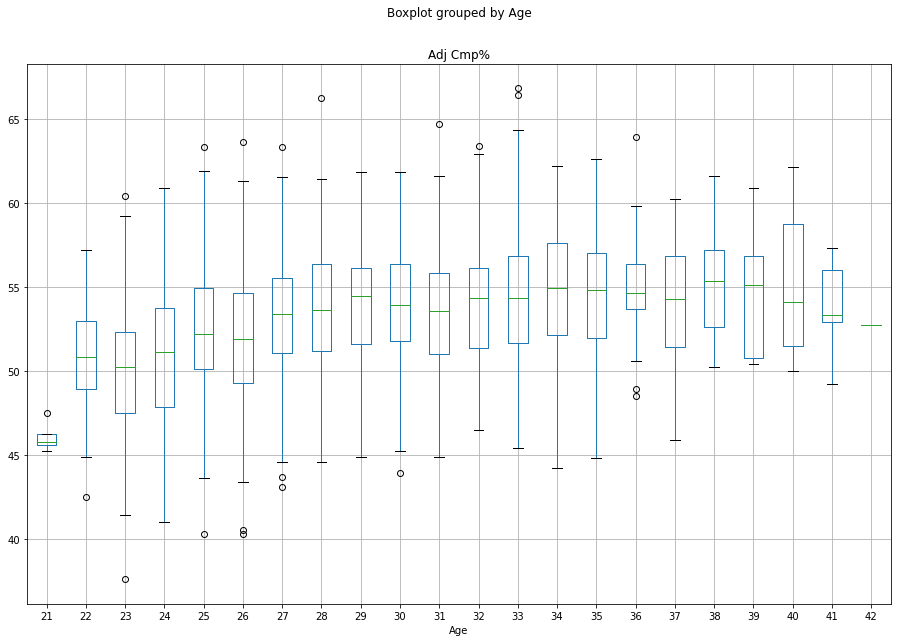

In [67]:
ret_only.boxplot(column = 'Adj Cmp%', by = 'Age', figsize = (15,10))

# Group by Retiree Age

In [100]:
ret_passing = ret_only.groupby(['Ret Age', 'Age']).agg({'Name': 'count', 'Attempts': 'sum', 'Adj Comp': 'sum', 'Adj Yards': 'sum', 'Adj TD': 'sum', 'Adj Int': 'sum'})
ret_passing.reset_index(inplace = True)
ret_passing

,Ret Age,Age,Name,Attempts,Adj Comp,Adj Yards,Adj TD,Adj Int
0,21,21,2,869,395.569031,4852.879611,19.350625,80.228777
1,23,22,3,708,360.809841,4182.245927,19.907429,49.017178
2,23,23,17,4739,2386.341266,29581.718057,142.184917,296.605201
3,24,21,1,290,137.707947,1786.987367,9.491407,31.607139
4,24,22,3,1112,583.155064,7619.266345,43.199943,45.877039
...,...,...,...,...,...,...,...,...
212,42,38,1,601,339.230628,4237.904650,18.391255,32.601508
213,42,39,1,606,343.853059,4199.641884,32.884307,24.666150
214,42,40,1,247,123.447073,1620.864521,7.063463,14.321621
215,42,41,1,528,295.440477,3695.424446,25.214698,28.381700


In [101]:
ret_only[ret_only.Age == 21]

,Name,Year,Age,Games,Attempts,Completions,Yards,TD,Int,Adj Y/A,Adj Cmp%,Adj TD%,Adj Int%,Final Year,Active,Ret Age,Adj TD,Adj Int,Adj Yards,Adj Comp
508,Drew Bledsoe,1993,21,13,429,214,2494,15,15,5.840792,0.456957,0.038568,0.058049,2006,False,34,16.545620,24.903235,2505.699733,196.034761
1127,Josh Freeman,2009,21,10,290,158,1855,10,18,6.162025,0.474855,0.032729,0.108990,2012,False,24,9.491407,31.607139,1786.987367,137.707947
1426,DeShone Kizer,2017,21,15,476,255,2894,11,22,5.828923,0.458012,0.021578,0.101541,2017,False,21,10.270993,48.333383,2774.567343,218.013692
1470,Josh Rosen,2018,21,14,393,217,2278,11,14,5.288326,0.451795,0.023103,0.081159,2018,False,21,9.079632,31.895394,2078.312268,177.555339


In [102]:
ret_passing['Cmp%'] = ret_passing['Adj Comp'] / ret_passing['Attempts']
ret_passing['Y/A'] = ret_passing['Adj Yards'] / ret_passing['Attempts']
ret_passing['TD%'] = ret_passing['Adj TD'] / ret_passing['Attempts']
ret_passing['Int%'] = ret_passing['Adj Int'] / ret_passing['Attempts']
ret_passing.head()

,Ret Age,Age,Name,Attempts,Adj Comp,Adj Yards,Adj TD,Adj Int,Cmp%,Y/A,TD%,Int%
0,21,21,2,869,395.569031,4852.879611,19.350625,80.228777,0.455200,5.584441,0.022268,0.092323
1,23,22,3,708,360.809841,4182.245927,19.907429,49.017178,0.509618,5.907127,0.028118,0.069233
2,23,23,17,4739,2386.341266,29581.718057,142.184917,296.605201,0.503554,6.242186,0.030003,0.062588
3,24,21,1,290,137.707947,1786.987367,9.491407,31.607139,0.474855,6.162025,0.032729,0.108990
4,24,22,3,1112,583.155064,7619.266345,43.199943,45.877039,0.524420,6.851858,0.038849,0.041256


In [108]:
retirement_season = (ret_passing['Ret Age'] == ret_passing['Age'])
ret_passing[retirement_season].groupby('Ret Age').agg({'Name': 'sum'})

,Name
Ret Age,
21,2
23,17
24,23
25,27
26,26
27,20
28,21
29,17
30,20


# More visualizations

In [103]:
px.line(ret_passing, x = 'Age', y = 'Cmp%', color = 'Ret Age')

In [104]:
px.line(ret_passing, x = 'Age', y = 'Y/A', color = 'Ret Age')

In [105]:
px.line(ret_passing, x = 'Age', y = 'TD%', color = 'Ret Age')

In [106]:
px.line(ret_passing, x = 'Age', y = 'Int%', color = 'Ret Age')